Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Load Data

In [2]:
ratings=pd.read_csv(r'c:\Users\ezath\Downloads\archive (10)\ratings_small.csv')
movies=pd.read_csv(r'c:\Users\ezath\Downloads\archive (10)\movies_metadata.csv',low_memory=False)

In [3]:
ratings['movieId'] = ratings['movieId'].astype(int)

Show Data

In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
ratings.tail()

,userId,movieId,rating,timestamp
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663
100003,671,6565,3.5,1074784724


In [6]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,100004.0,3.470113e+02,1.951638e+02,1.0,182.0,3.670000e+02,5.200000e+02,6.710000e+02
movieId,100004.0,1.254866e+04,2.636920e+04,1.0,1028.0,2.406500e+03,5.418000e+03,1.639490e+05
rating,100004.0,3.543608e+00,1.058064e+00,0.5,3.0,4.000000e+00,4.000000e+00,5.000000e+00
timestamp,100004.0,1.129639e+09,1.916858e+08,789652009.0,965847824.0,1.110422e+09,1.296192e+09,1.476641e+09


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [9]:
ratings.shape

(100004, 4)

In [10]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [11]:
movies.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [12]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
revenue,45460.0,1.120935e+07,6.433225e+07,0.0,0.0,0.0,0.0,2.787965e+09
runtime,45203.0,9.412820e+01,3.840781e+01,0.0,85.0,95.0,107.0,1.256000e+03
vote_average,45460.0,5.618207e+00,1.924216e+00,0.0,5.0,6.0,6.8,1.000000e+01
vote_count,45460.0,1.098973e+02,4.913104e+02,0.0,3.0,10.0,34.0,1.407500e+04


In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [14]:
movies.shape

(45466, 24)

In [15]:
movies.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

Data Cleaning

Check for null values in ratings

In [16]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Check for duplicated Values in ratings

In [17]:
ratings.duplicated().sum()

np.int64(0)

Check for outliers in ratings

In [18]:
numeric_cols = ['rating','timestamp']

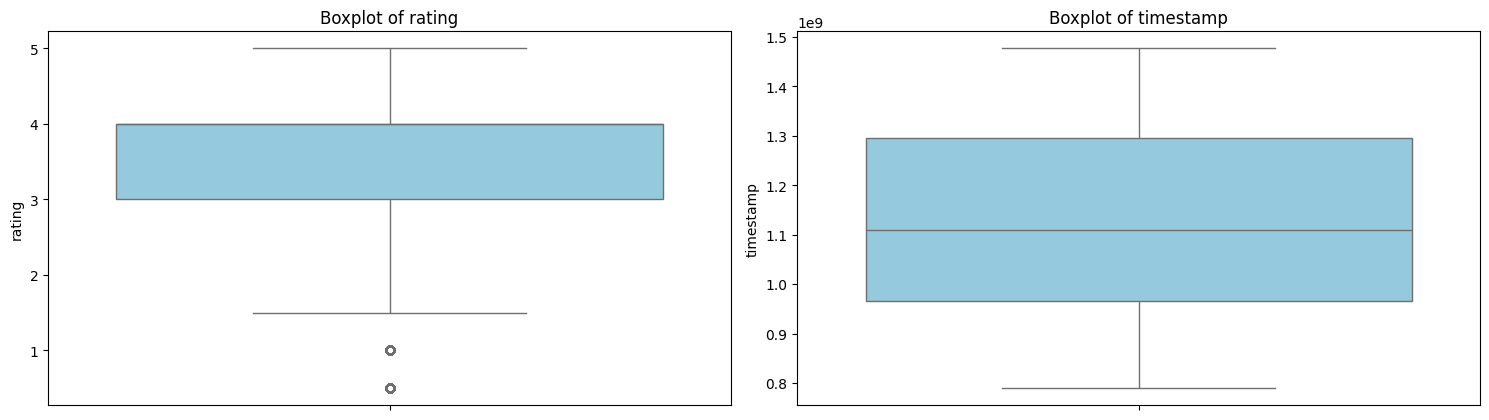

In [19]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(y=ratings[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

EDA Visualization

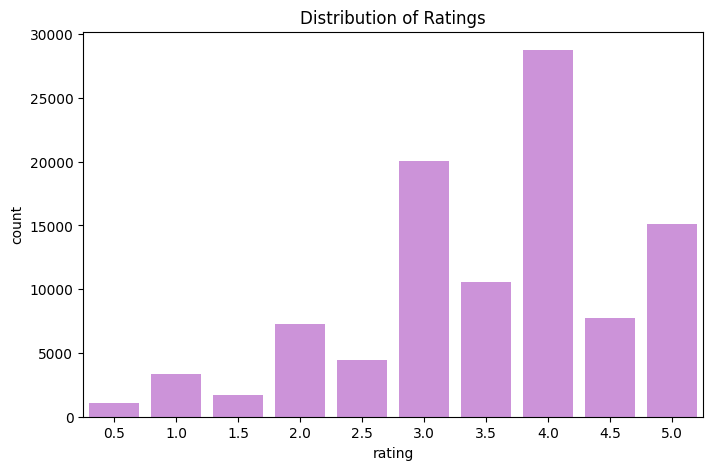

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=ratings,color="#d388e4")
plt.title("Distribution of Ratings")
plt.show()

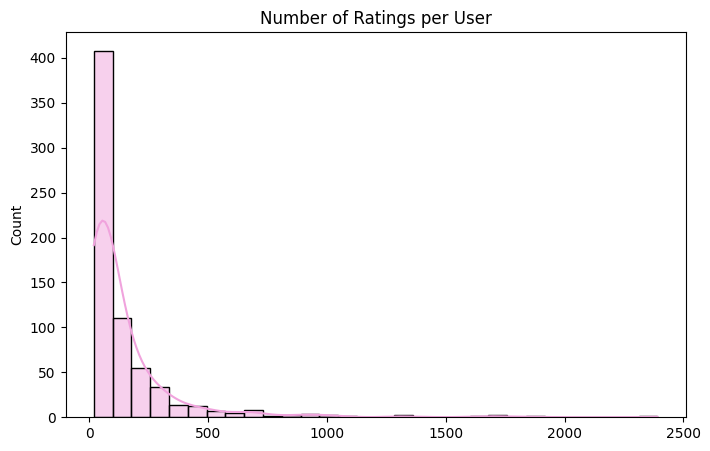

In [21]:
ratings_per_user = ratings.groupby('userId').size()
plt.figure(figsize=(8,5))
sns.histplot(ratings_per_user, bins=30, kde=True,color="#f0a3dd")
plt.title("Number of Ratings per User")
plt.show()

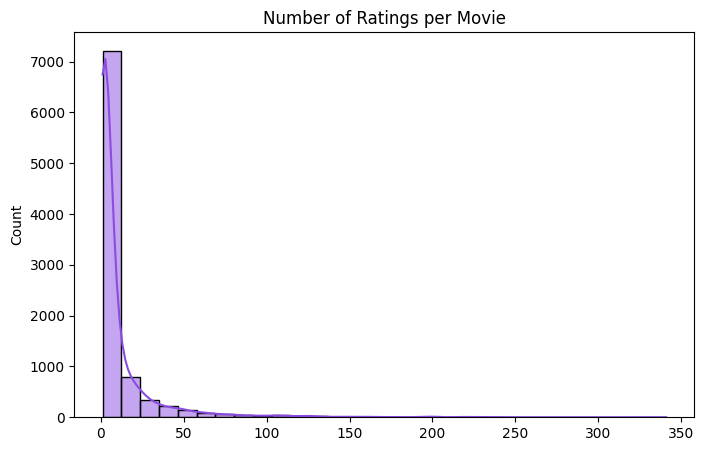

In [22]:
ratings_per_movie = ratings.groupby('movieId').size()
plt.figure(figsize=(8,5))
sns.histplot(ratings_per_movie, bins=30, kde=True,color="#8a4de0")
plt.title("Number of Ratings per Movie")
plt.show()

User-Item Matrix

In [23]:
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')
user_item_matrix.columns = user_item_matrix.columns.astype(int)

In [24]:
user_similarity = cosine_similarity(user_item_matrix.fillna(0))

User-Based Collaborative Filtering

In [25]:
user_id=1
user_idx = user_id - 1  

In [26]:
similar_users = user_similarity[user_idx]
similar_users[user_idx] = 0
sorted_users = np.argsort(similar_users)[::-1]

In [27]:
user_rated_movies = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id].notna()].index

In [28]:
top_n_similar_users = 5
recommendations = {}

for similar_user_idx in sorted_users[:top_n_similar_users]:
    similar_user_id = user_item_matrix.index[similar_user_idx]
    similar_user_ratings = user_item_matrix.loc[similar_user_id]

    for movie_id, rating in similar_user_ratings.items():
        if movie_id not in user_rated_movies and not np.isnan(rating):
            if movie_id in recommendations:
                recommendations[movie_id].append(rating)
            else:
                recommendations[movie_id] = [rating]

In [29]:
avg_recommendations = {movie: np.mean(r) for movie, r in recommendations.items()}

In [30]:
sorted_recommendations = sorted(avg_recommendations.items(), key=lambda x: x[1], reverse=True)

In [31]:
top_10 = sorted_recommendations[:10]

In [32]:
movies = movies[['id', 'title']]
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')
movies = movies.dropna(subset=['id'])
movies['id'] = movies['id'].astype(int)

In [33]:
top_10_movies = []
for movie_id, rating in top_10:
    movie_row = movies[movies['id'] == movie_id]
    if not movie_row.empty:   
        top_10_movies.append((movie_row['title'].values[0], rating))

 Train/Test split per user (holdout per user)


In [34]:
def train_test_split_by_user(ratings_df, test_size=0.2, min_ratings=5, seed=42):
    np.random.seed(seed)
    train_list = []
    test_list = []
    for user, grp in ratings_df.groupby('userId'):
        n = len(grp)
        if n >= min_ratings:
            k = max(1, int(n * test_size))
        else:
            k = 1
        test_idx = grp.sample(n=k, random_state=seed).index
        test_list.append(grp.loc[test_idx])
        train_list.append(grp.drop(test_idx))
    train = pd.concat(train_list).reset_index(drop=True)
    test = pd.concat(test_list).reset_index(drop=True)
    return train, test

In [35]:
train_ratings, test_ratings = train_test_split_by_user(ratings, test_size=0.2)

Build user-item matrix from TRAIN only


In [36]:
train_user_item = train_ratings.pivot(index='userId', columns='movieId', values='rating')
train_user_item.columns = train_user_item.columns.astype(int)

Compute similarity on train matrix

In [37]:
train_user_similarity = cosine_similarity(train_user_item.fillna(0))

Recommendation function (user-based, basic average of neighbors)


In [38]:
def recommend_user_based(user_id, user_item_matrix, user_similarity_matrix,top_n_similar_users=5, top_k=10):
    if user_id not in user_item_matrix.index:
        return []
    user_idx = user_item_matrix.index.get_loc(user_id)
    sim = user_similarity_matrix[user_idx].copy()
    sim[user_idx] = 0
    sorted_users = np.argsort(sim)[::-1] 
    user_rated = set(user_item_matrix.loc[user_id][user_item_matrix.loc[user_id].notna()].index)
    recommendations = {}
    for sim_idx in sorted_users[:top_n_similar_users]:
        sim_user_id = user_item_matrix.index[sim_idx]
        sim_ratings = user_item_matrix.loc[sim_user_id]
        for movie_id, rating in sim_ratings.items():
            if movie_id not in user_rated and not np.isnan(rating):
                recommendations.setdefault(movie_id, []).append(rating)
   
    avg = {m: np.mean(r) for m, r in recommendations.items()}
    sorted_avg = sorted(avg.items(), key=lambda x: x[1], reverse=True)
    return [m for m, _ in sorted_avg[:top_k]]

Precision@K evaluation


In [39]:
def precision_at_k(recommended, relevant, k):
    if k == 0:
        return 0.0
    hits = len(set(recommended[:k]) & set(relevant))
    return hits / k

In [40]:
K = 10
users_to_evaluate = test_ratings['userId'].unique()
precisions = []
evaluated_users = 0

In [ ]:
for user in users_to_evaluate:
    if user not in train_user_item.index:
        continue
    relevant = test_ratings[test_ratings['userId'] == user]['movieId'].unique()
    if len(relevant) == 0:
        continue
    recs = recommend_user_based(user, train_user_item, train_user_similarity,
                                top_n_similar_users=5, top_k=K)
    if len(recs) == 0:
        continue
    p = precision_at_k(recs, relevant, K)
    precisions.append(p)
    evaluated_users += 1

In [ ]:
mean_precision_at_k = np.mean(precisions) if len(precisions) > 0 else 0.0
print(f"Evaluated Precision@{K} on {evaluated_users} users. Mean Precision@{K}: {mean_precision_at_k:.4f}")

Evaluated Precision@10 on 671 users. Mean Precision@10: 0.0699


Show sample recommendations with movie titles for a few users


In [ ]:
movies_small = movies[['id', 'title']].copy()
movies_small['id'] = pd.to_numeric(movies_small['id'], errors='coerce')
movies_small = movies_small.dropna(subset=['id'])
movies_small['id'] = movies_small['id'].astype(int)

In [ ]:
sample_users = list(users_to_evaluate[:5])  # first 5 users from test set
for u in sample_users:
    if u not in train_user_item.index:
        print(f"User {u}: not in train (cold-start) — skipping")
        continue
    rec_ids = recommend_user_based(u, train_user_item, train_user_similarity, top_k=10)
    rec_titles = []
    for mid in rec_ids:
        row = movies_small[movies_small['id'] == mid]
        if not row.empty:
            rec_titles.append(row['title'].values[0])
    print(f"\nUser {u} recommendations (titles):")
    if rec_titles:
        for t in rec_titles:
            print(" -", t)
    else:
        print("  (no recommendations found)")


User 1 recommendations (titles):
 - Walk the Line
 - Men in Black II
 - Sleepless in Seattle
 - André Hazes, Zij Gelooft in Mij
 - Phar Lap
 - Snakes on a Plane
 - A Brief History of Time

User 2 recommendations (titles):
 - The Day After Tomorrow
 - The Million Dollar Hotel
 - Men in Black II

User 3 recommendations (titles):
 - Stranger Than Fiction
 - Windows on Monday
 - Solaris
 - Rebecca
 - Monsoon Wedding
 - Point Break

User 4 recommendations (titles):
 - Madagascar
 - 5 Card Stud
 - New York Doll
 - Three Colors: Red
 - The Sixth Sense
 - Meet the Robinsons
 - Gerry

User 5 recommendations (titles):
 - Jacob's Ladder
 - Dogville
 - Maradona by Kusturica
 - Rebecca
 - The Wrong Trousers
